In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from prepare import titanic_pipeline

<h1 class="alert alert-block alert-success" style="font-size: 20px;"> Methodologies I > Classification > Modeling > Decission Tree</h1>  

<h2 class="alert alert-block alert-info" style="font-size: 20px;">1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</h2>

<h2 style='background-color: #F5F5F5; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: Green; font-size: 18px; box-sizing: border-box;'>The baseline prediction is 0 or died.

<h2 style='background-color: #F5F5F5; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: Green; font-size: 18px; box-sizing: border-box;'>Baseline accuracy when predicting death on every prediction is 62%

In [2]:
#Acquire and Prepare Titanic data
train, val, test = titanic_pipeline()
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,Southampton,0


In [3]:
#create dummy variables (binary variables) for the 'sex' column. 
train = pd.get_dummies(train, columns = ['sex'], drop_first = True) #drop the first dummy column (female)
#create dummy variables for the 'class' and 'embark_town' columns. 
train = pd.get_dummies(train, columns = ['class', 'embark_town'])
train.head()


,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,True,True,False,False,False,False,True
45,0,29.0,0,0,8.0500,1,True,False,False,True,False,False,True
28,1,29.0,0,0,7.8792,1,False,False,False,True,False,True,False
633,0,29.0,0,0,0.0000,1,True,True,False,False,False,False,True
403,0,28.0,1,0,15.8500,0,True,False,False,True,False,False,True


In [4]:
#do the same for val df
val = pd.get_dummies(val, columns = ['sex'], drop_first = True)
val = pd.get_dummies(val, columns = ['class', 'embark_town'])
val.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
377,0,27.0,0,2,211.500,0,True,True,False,False,True,False,False
244,0,30.0,0,0,7.225,1,True,False,False,True,True,False,False
72,0,21.0,0,0,73.500,1,True,False,True,False,False,False,True
815,0,29.0,0,0,0.000,1,True,True,False,False,False,False,True
841,0,16.0,0,0,10.500,1,True,False,True,False,False,False,True


In [5]:
#ensure they are the same shape
train.shape, val.shape

((623, 13), (134, 13))

In [6]:
#Create X_train (remove the target variable)
X_train = train.drop(columns = ['survived'])
#Create Y_train (only the target variable)
y_train = train.survived

#Create X_val (remove the target variable)
X_val = val.drop(columns = ['survived'])
#Create Y_val (only the target variable)
y_val = val.survived

In [7]:
#Define the baseline
y_train.mode()
#0 means died, 1 survived
#the mode is died (0)

0    0
Name: survived, dtype: int64

In [8]:
#Get the baseline accuracy. Accuracy = Ratio of true predictions to the total number of predictions
base_acc = (y_train == 0).mean()#when applying mean to a t/f df, the trues values are 1.
base_acc

0.6163723916532905

<h2 class="alert alert-block alert-info" style="font-size: 20px;">2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)</h2>


In [9]:
#Create the Decision tree

#set the seed
seed = 42
#Create the instance of the decision tree
clf = DecisionTreeClassifier(random_state = seed)
#train/fit the decicion tree using xtrain
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
#Make the predictions!
train_preds = clf.predict(X_train)
train_preds[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

<h2 class="alert alert-block alert-info" style="font-size: 20px;">3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.</h2>


In [19]:
#check the score of the train df. This creates the predictions and checks the correctness in one fucntion
clf.score(X_train, y_train)

0.9759229534510433

In [17]:
#Classification report
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       384
           1       1.00      0.94      0.97       239

    accuracy                           0.98       623
   macro avg       0.98      0.97      0.97       623
weighted avg       0.98      0.98      0.98       623



<h2 class="alert alert-block alert-info" style="font-size: 20px;">4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</h2>


In [27]:
#Create the confusion matrix from the y_train (catual target variable) and the train predictions
conf_matrix = confusion_matrix(y_train, train_preds)
print(conf_matrix)
#assign a variable to each outcome to be used on later calculations
tn, fp, fn, tp = conf_matrix.ravel()
print(tn, fp, fn, tp)

[[383   1]
 [ 14 225]]
383 1 14 225


In [41]:
#Calculate tpr, fpr, tnr,fnr
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
#display the rates
print(f"True Positive Rate    {tpr:.4f}")
print(f"False Positive Rate   {fpr:.4f}")
print(f"True Negative Rate    {tnr:.4f}")
print(f"False Negative Rate   {fnr:.4f}")

True Positive Rate    0.9414
False Positive Rate   0.0026
True Negative Rate    0.9974
False Negative Rate   0.0586


<h2 class="alert alert-block alert-info" style="font-size: 20px;">5. Run through steps 2-4 using a different max_depth value.</h2>


In [44]:
#Loop to 
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 15):
    
    clf = DecisionTreeClassifier(max_depth = i, random_state = seed)
    
    clf.fit(X_train, y_train)
    
    depth.append(i)
    
    train_acc.append(clf.score(X_train, y_train))
    
    val_acc.append(clf.score(X_val, y_val))

In [ ]:
#Loop to 
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 15):
    
    clf = DecisionTreeClassifier(max_depth = i, random_state = seed)
    
    clf.fit(X_train, y_train)
    
    depth.append(i)
    
    train_acc.append(clf.score(X_train, y_train))
    
    val_acc.append(clf.score(X_val, y_val))

In [45]:
trees = pd.DataFrame({'max_depth': depth,
                      'train_acc': train_acc,
                      'val_acc': val_acc})

trees

,max_depth,train_acc,val_acc
0,2,0.807384,0.798507
1,3,0.829856,0.835821
2,4,0.845907,0.835821
3,5,0.863563,0.820896
4,6,0.879615,0.820896
5,7,0.895666,0.798507
6,8,0.914928,0.813433
7,9,0.924559,0.813433
8,10,0.935795,0.813433
9,11,0.947030,0.813433


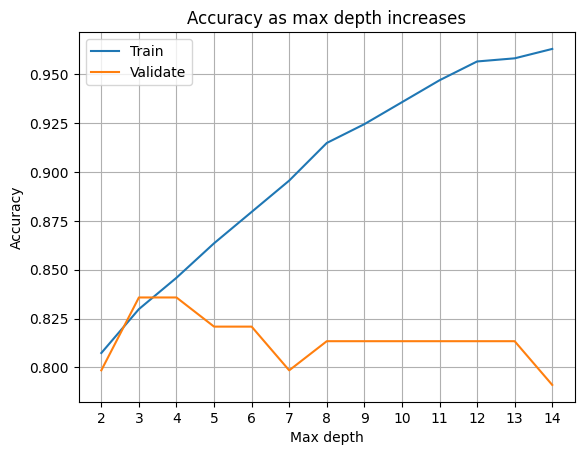

In [48]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.grid(True)
plt.xticks(range(min(trees.max_depth), max(trees.max_depth)+1))
plt.show()

<h2 class="alert alert-block alert-info" style="font-size: 20px;">6. Which model performs better on your in-sample data?</h2>


<div style='background-color: #F5F5F5; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: Green; font-size: 18px; box-sizing: border-box;'>
14 depth

In [ ]:
#check the score of the validate df. This creates the predictions and checks the correctness in one fucntion
clf.score(X_val, y_val)

0.7910447761194029

<h2 class="alert alert-block alert-info" style="font-size: 20px;">7. Which model performs best on your out-of-sample data, the validate set?</h2>

<div style='background-color: #F5F5F5; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: Green; font-size: 18px; box-sizing: border-box;'>
3 depth